# EX5 Network Analysis

Points
- Q1 4P
- Q2 4P
- Q3 2P

In [1]:
# モジュールのインポート
import networkx as nx
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In the following, a graph object `G` is created from "karate club" dataset in `networkx` module. And its social network is visualized. The network is undirected and unweighted. There are no self-loops or multiple links between nodes.


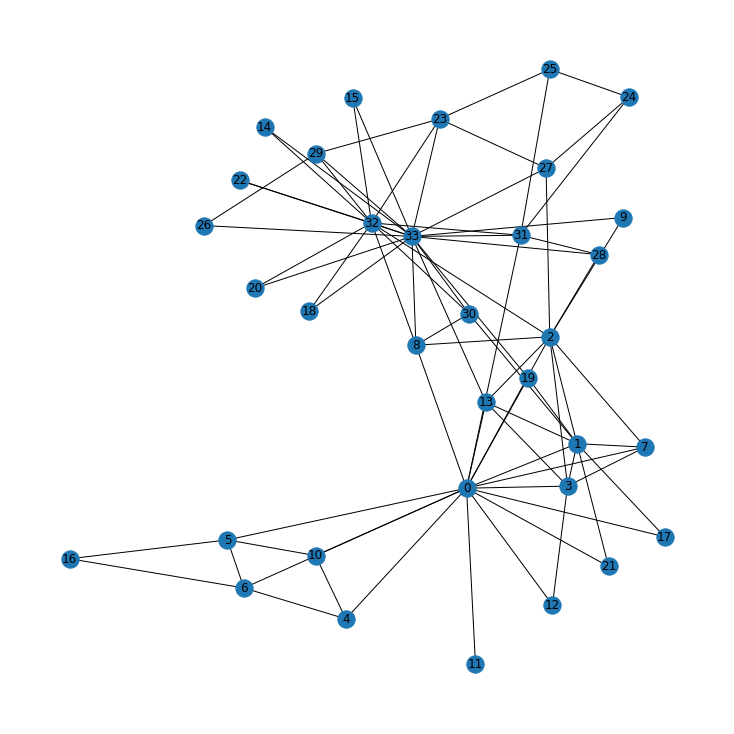

In [2]:
G = nx.karate_club_graph() # グラフの作成
pos = nx.spring_layout(G) # 可視化のレイアウト
plt.figure(figsize=(10,10)) # 可視化のサイズ
nx.draw(G, pos=pos, with_labels=True) # 可視化

The network contains 34 nodes and 78 links. Each node is numbered from 0 to 33. In the following, we use these numbers as labels for the nodes.

In [3]:
print(len(G)) # ノード数
print(G.size()) # リンク数

34
78


The adjacency matrix `adj_matrix` of this network is as follows.

In [4]:
adj_matrix=nx.adjacency_matrix(G).toarray() # 隣接行列の取得
for row in adj_matrix:
    print(row)

[0 1 1 1 1 1 1 1 1 0 1 1 1 1 0 0 0 1 0 1 0 1 0 0 0 0 0 0 0 0 0 1 0 0]
[1 0 1 1 0 0 0 1 0 0 0 0 0 1 0 0 0 1 0 1 0 1 0 0 0 0 0 0 0 0 1 0 0 0]
[1 1 0 1 0 0 0 1 1 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 1 0]
[1 1 1 0 0 0 0 1 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[1 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[1 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[1 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 1]
[0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1]
[1 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1]
[0 0 0 0 0 0 0 0 0 0

## Q1.1
The following dictionary `adj_list` is a dictionary with each node of the above network as key and a list of nodes adjacent to each node as value. 

For example, by looking at the list corresponding to node 31, we can see that node 31 has 0, 24, 25, 28, 32 and 33 nodes as its neighbours. The dictionary consisting of lists nodes adjacent to each node is called an adjacency list.

```Python
adj_list={0: [1, 2, 3, 4, 5, 6, 7, 8, 10, 11, 12, 13, 17, 19, 21, 31],
                1: [0, 2, 3, 7, 13, 17, 19, 21, 30],
                2: [0, 1, 3, 7, 8, 9, 13, 27, 28, 32],
                  ...
                31: [0, 24, 25, 28, 32, 33],
                32: [2, 8, 14, 15, 18, 20, 22, 23, 29, 30, 31, 33],
                33: [8, 9, 13, 14, 15, 18, 19, 20, 22, 23, 26, 27, 28, 29, 30, 31, 32]}
```

Complete the following  `get_adj_list` function that takes an adjacency matrix as its argument `adj_matrix` and returns a dictionary `adj_list` as an adjacency list.

In [9]:
def get_adj_list(adj_matrix):
    adj_list={}
    for i in range(len(adj_matrix)):
      adj_list[i] = []
      for j in range(len(adj_matrix[i])):
        if adj_matrix[i][j] == 1:
          adj_list[i].append(j)
    return adj_list

Once the `get_adj_list` is complete, run the following cell. 

For example, print `adj_list[0]` or `adj_list[33]` and then check that the above-shown adjacency list is properly created.


In [10]:
adj_list=get_adj_list(adj_matrix)

print(adj_list[0])
print(adj_list[33])

[1, 2, 3, 4, 5, 6, 7, 8, 10, 11, 12, 13, 17, 19, 21, 31]
[8, 9, 13, 14, 15, 18, 19, 20, 22, 23, 26, 27, 28, 29, 30, 31, 32]


### Q1.2
First check the algorithm for width-first search described in the lecutre material. 

Complete the following `bfs` function that takes an adjacency list as its first argument `g` and a starting node label as its second argument `s` and returns a dictionary `d` with node labels as keys and distances from `s` to each note as values.

Note that we use the above adjacency list `adj_list` as the input. 

`Q.enqueue` and `Q.dequeue` shown in the lecture material correspond to `Q.append` and `Q.popleft` in the code respectively.



In [14]:
from collections import deque # キューのインポート
def bfs(g, s):
    ### 引数：
    # g: 隣接リスト
    # s: 始点ノードのラベル
    
    Q = deque() # キューの初期化
    visited={} # 訪問済みノード辞書
    d={} # 始点から各ノードへの距離の辞書
    for i in g.keys(): # ネットワークの各ノードiについて
        d[i]=np.inf # 距離の辞書を全て距離無限大に初期化
        visited[i]=False  # 訪問済みノード辞書を全て未訪問（False）に初期化
        
    visited[s]=True # 始点ノードを訪問済みにする
    d[s]=0 # 始点ノード自身への距離は0
    Q.append(s) # 始点ノードをキューに入れる

    while Q: # キューが空でない限り繰り返し
        i = Q.popleft()
        ### your code is here ###
        for val in g[i]:
          if visited[val] == False:
            d[val] = d[i]+1
            visited[val] = True
            Q.append(val)
    return d # 始点から各ノードへの距離の辞書を返す

Once the `bfs` function is complete, run the following cell. The distance (path length) from node 0 to node 26 is 3.


In [15]:
d1=bfs(adj_list, 0)
print(d1[26])

d2=bfs(adj_list, 11)
print(d2[26])

3
4


## Q2
In the following, the degree centrality of each node is calculated for the karate club social network.

The nodes with relatveily high degree centralities are shown with their centrality scores. For example, node 33 has the highest degree centrality.

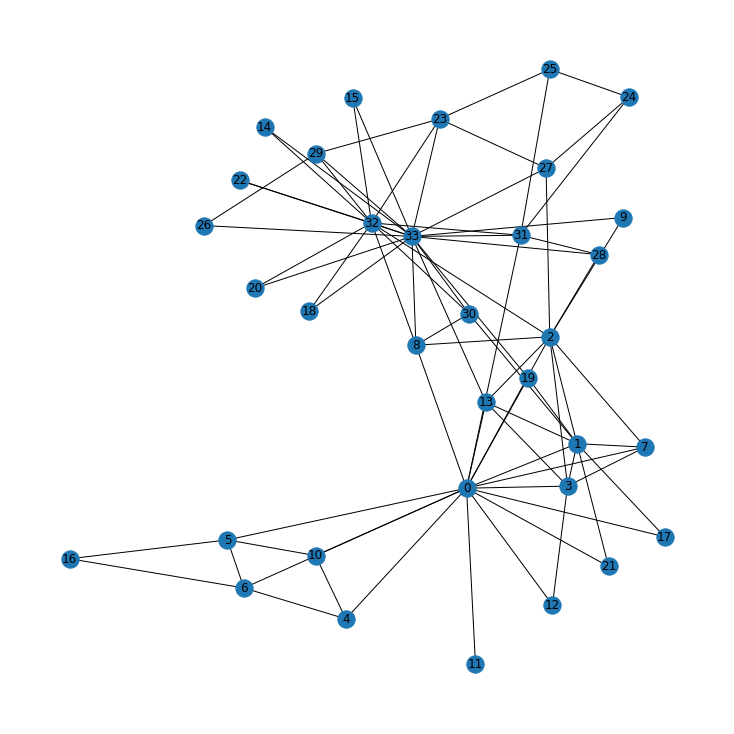

In [16]:
G = nx.karate_club_graph()
plt.figure(figsize=(10,10)) # 可視化のサイズ
nx.draw(G, pos=pos, with_labels=True) # 可視化

In [17]:
# 次数中心性 (次数/最大次数（N-1))
degree=nx.degree_centrality(G)
print(pd.Series(degree).sort_values(ascending=False).head(5)) 

33    0.515152
0     0.484848
32    0.363636
2     0.303030
1     0.272727
dtype: float64


For each centrality, closness, betweenness, and eigenvector, the top nodes are as follows.

Observe where those top nodes are located in the visualized network.


In [18]:
# 近接中心性
print('closeness')
closeness = nx.closeness_centrality(G)
print(pd.Series(closeness).sort_values(ascending=False).head(5))

# 媒介中心性
print('betweenness')
betweenness = nx.betweenness_centrality(G)
print(pd.Series(betweenness).sort_values(ascending=False).head(5))

# 固有ベクトル中心性
print('eigenvector')
eigen = nx.eigenvector_centrality(G)
print(pd.Series(eigen).sort_values(ascending=False).head(5))

closeness
0     0.568966
2     0.559322
33    0.550000
31    0.540984
13    0.515625
dtype: float64
betweenness
0     0.437635
33    0.304075
32    0.145247
2     0.143657
31    0.138276
dtype: float64
eigenvector
33    0.373371
0     0.355483
2     0.317189
32    0.308651
1     0.265954
dtype: float64


In the following, we implement a function to compute PageRank of each node. Complete the `pagerank_centrality` function that takes an adjacency matrix as its first argument `adj_matrix`, a damping factor (specifying the proportion of normal and teleport moves) as its second argument `alpha`, and the number of iterations of a power method as its third argument `t`.
The function returns a vector (one-dimensional array) whose elements are PageRank scores of each node. The index of each element of the vector corresponds to the node label.

Given the damping factor $\alpha$ and the transition probability matrix $A$, 
the matrix $B$ for iteratively computing PageRank is defined as follows.

$B=\alpha A+\frac{1-\alpha}{\# of nodes}$

$A$ is a modified adjacency matrix in which all elements in a column of all zeros are set to 1, and then divided by the number of rows.

Using $B$, the vector representing PageRank $x=(x_1,x_2,... ,x_n)$ is updated as follows.

$x=Bx$


In [69]:
A = np.array([[0,0,0,0],
     [1,0,0,0],
     [0,1,0,0],
     [0,1,0,0]])

A[:,A.sum(0)==0]=1
A = A/A.sum(axis=0)
alpha = 0.85
B = alpha * A +(1-alpha)/len(A)
B

array([[0.0375, 0.0375, 0.25  , 0.25  ],
       [0.8875, 0.0375, 0.25  , 0.25  ],
       [0.0375, 0.4625, 0.25  , 0.25  ],
       [0.0375, 0.4625, 0.25  , 0.25  ]])

In [78]:
def pagerank_centrality(adj_matrix, alpha=0.85, t=100):
    # すべての要素が0の列があればその列のすべての要素を1とする
    adj_matrix[:, adj_matrix.sum(0)==0]=1
    A = adj_matrix/adj_matrix.sum(axis =0 )
    B = alpha * A +(1-alpha)/len(adj_matrix)
    x = [1/len(adj_matrix)]*len(adj_matrix)
    for i in range(t):
      x = B.dot(x)
    return x

Once the `pagerank_centrality` function is complete, run the following cell. The node with the highest PageRank is 33 and its PageRank score is $\simeq0.10$.


In [79]:
adj_matrix=nx.adjacency_matrix(G).toarray()
pagerank=pagerank_centrality(adj_matrix, 0.85, 100)
#print(pagerank)
print(pd.Series(pagerank).sort_values(ascending=False).head(5))

33    0.100919
0     0.096997
32    0.071693
2     0.057079
1     0.052877
dtype: float64


PageRank of each node by `nx.pagerank` function in  NetworkX is as follows.

In [53]:
pr=nx.pagerank(G, alpha=0.85, max_iter=100)
print(pd.Series(pr).sort_values(ascending=False).head(5))

33    0.100918
0     0.097002
32    0.071692
2     0.057078
1     0.052878
dtype: float64


## Q3
In the following, we perform community detection for the 'karate club" social network.


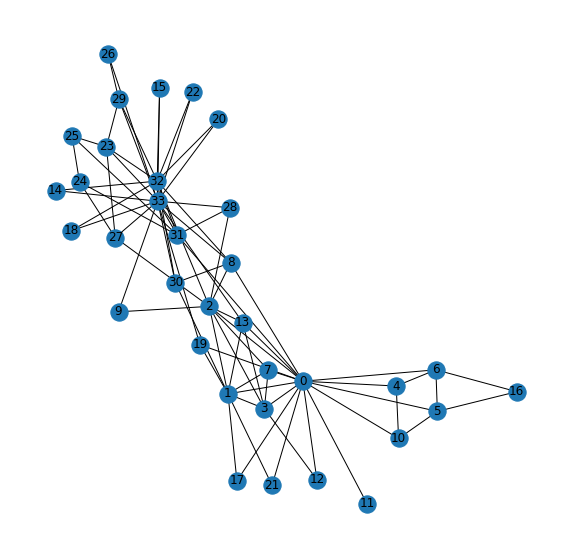

In [81]:
G = nx.karate_club_graph()
pos = nx.spring_layout(G)
plt.figure(figsize=(10,10))
nx.draw_networkx(G, pos=pos)
_ = plt.axis('off')

Complete the following `girvan_newman` function that performs community detection using edge betweenness centrality (Girvan-Newman method). The `girvan_newman` function takes a networkx graph object as its argument `G` and returns a list with a node set of each community as its elements.

In [85]:
def girvan_newman(G):
    G = G.copy() # グラフGのエッジを除いていくのでグラフオブジェクトをコピーしておく
    removed_edges=[] # 取り除いたエッジのリスト
    
    while nx.number_connected_components(G) ==1: # グラフが分割されるまで繰り返す
      # remove the highest betweenness edge from G
      # Add end nodes of the removed edge as a tuple of node labels to a list "removed_edges"
      ### your code is here ###
      bestG = find_best_edge(G)
      G.remove_edge(bestG[0],bestG[1])
      removed_edges.append(bestG)
    return list(nx.connected_components(G)), removed_edges

def find_best_edge(G): # グラフGにおいてエッジ媒介中心性が一番大きいエッジの両端ノードをタプルとして返す関数
    edge_between = nx.edge_betweenness_centrality(G)     
    return max(edge_between, key=edge_between.get)

Once the `girvan_newman` function is complete, run the following cell.
`removed_edges` should be as follows.

```Python
 [(0, 31), (0, 2), (0, 8), (13, 33), (19, 33), (2, 32), (1, 30), (1, 2), (2, 3), (2, 7), (2, 13)]
 ```

In [86]:
communities, removed_edges = girvan_newman(G)
print(removed_edges)

[(0, 31), (0, 2), (0, 8), (13, 33), (19, 33), (2, 32), (1, 30), (1, 2), (2, 3), (2, 7), (2, 13)]


Run the following cell. The communities are visualized with different colors. The removed edges are highighted by dashed lines.

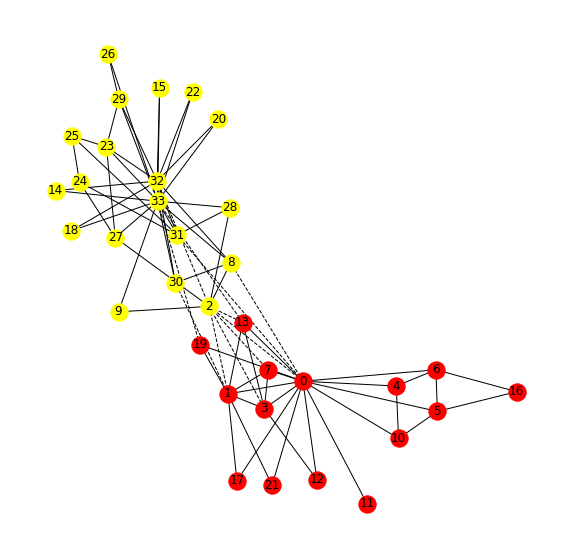

In [87]:
keeped_edges = set(G.edges()) - set(removed_edges)
colors = ['red', 'yellow']

plt.figure(figsize=(10,10))
nx.draw_networkx_edges(G, pos, edgelist=keeped_edges)
nx.draw_networkx_edges(G, pos, edgelist=removed_edges, style='dashed')
for community, color in zip(communities, colors):
    nx.draw_networkx_nodes(G, pos=pos, nodelist=community, node_color=color)
nx.draw_networkx_labels(G, pos=pos)
_ = plt.axis('off')

### 参考

In [88]:
# networkx(バージョン2.X以上)のGirvan–Newman法の関数によるコミュニティ抽出
community_generator = nx.community.girvan_newman(G)

# community_generatorはジェネレーターとなっており、for文を繰り返すごとにコミュニティ分割を行う
# 最終的には各ノードが1つのコミュニティの状態となる
for communities in community_generator: 
    print(communities)

({0, 1, 3, 4, 5, 6, 7, 10, 11, 12, 13, 16, 17, 19, 21}, {2, 8, 9, 14, 15, 18, 20, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33})
({0, 1, 3, 4, 5, 6, 7, 10, 11, 12, 13, 16, 17, 19, 21}, {32, 33, 2, 8, 14, 15, 18, 20, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31}, {9})
({0, 1, 3, 7, 11, 12, 13, 17, 19, 21}, {32, 33, 2, 8, 14, 15, 18, 20, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31}, {4, 5, 6, 10, 16}, {9})
({0, 1, 3, 7, 11, 12, 13, 17, 19, 21}, {2, 24, 25, 27, 28, 31}, {4, 5, 6, 10, 16}, {32, 33, 8, 14, 15, 18, 20, 22, 23, 26, 29, 30}, {9})
({0, 1, 3, 7, 12, 13, 17, 19, 21}, {2, 24, 25, 27, 28, 31}, {4, 5, 6, 10, 16}, {32, 33, 8, 14, 15, 18, 20, 22, 23, 26, 29, 30}, {9}, {11})
({0, 1, 3, 7, 12, 13, 17, 19, 21}, {2, 24, 25, 27, 28, 31}, {4, 5, 6, 10, 16}, {32, 33, 8, 14, 15, 18, 20, 22, 23, 29, 30}, {9}, {11}, {26})
({0, 1, 3, 7, 13, 17, 19, 21}, {2, 24, 25, 27, 28, 31}, {4, 5, 6, 10, 16}, {32, 33, 8, 14, 15, 18, 20, 22, 23, 29, 30}, {9}, {11}, {12}, {26})
({0, 1, 3, 7, 13, 17, 19, 21}, {2, 24, 25

## Code Testing


In [72]:
## Run this cell first
!pip install prog_edu_assistant_tools
import re
import sys
import jinja2
from IPython.core import display
from google.colab import _message as google_message
from prog_edu_assistant_tools.magics import report, autotest, CaptureOutput
from prog_edu_assistant_tools.check import Check

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.6 MB 37.6 MB/s 


## Q1.1

In [73]:
# Run this cell to check your solution.
# If you get an error 'Check not defined', make sure you have run all preceding
# cells once (Runtime -> Run before)
Check('q1_1')

## Q1.2

In [74]:
# Run this cell to check your solution.
# If you get an error 'Check not defined', make sure you have run all preceding
# cells once (Runtime -> Run before)
Check('q1_2')

## Q2

In [80]:
# Run this cell to check your solution.
# If you get an error 'Check not defined', make sure you have run all preceding
# cells once (Runtime -> Run before)
Check('q2')

## Q3

In [89]:
# Run this cell to check your solution.
# If you get an error 'Check not defined', make sure you have run all preceding
# cells once (Runtime -> Run before)
Check('q3')